In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Problem 1

In [4]:
from sklearn.datasets import load_iris

In [5]:
irisRaw=load_iris()

In [6]:
iris_data = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

In [7]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
# Separating out the features
x = iris_data.iloc[:, [0,1,2,3]].values
# Separating out the target
y = iris_data.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [9]:
y_pd=pd.DataFrame(y,columns=['target'])

In [10]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
finalDf=pd.concat([principalDf,y_pd],axis=1)

In [12]:
indicesToKeep0 = finalDf.iloc[:,2] == 0
indicesToKeep1 = finalDf.iloc[:,2] == 1
indicesToKeep2 = finalDf.iloc[:,2] == 2

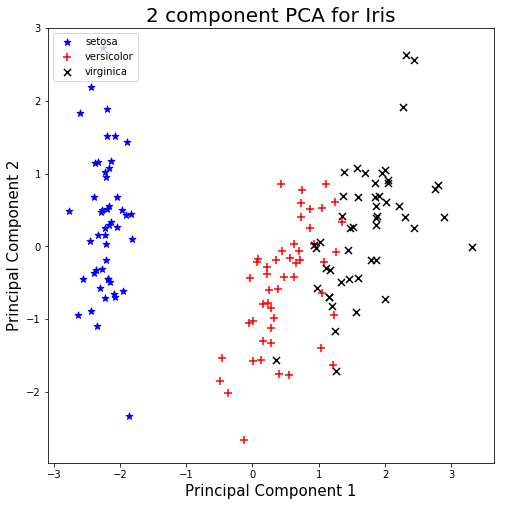

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Iris', fontsize = 20)
ax.scatter(finalDf.loc[indicesToKeep0, 'principal component 1']
               , finalDf.loc[indicesToKeep0, 'principal component 2']
               , c = 'blue',marker='*'
               , s = 50,label='setosa')
ax.scatter(finalDf.loc[indicesToKeep1, 'principal component 1']
               , finalDf.loc[indicesToKeep1, 'principal component 2']
               , c = 'red',marker='+'
               , s = 50,label='versicolor')
ax.scatter(finalDf.loc[indicesToKeep2, 'principal component 1']
               , finalDf.loc[indicesToKeep2, 'principal component 2']
               , c = 'black',marker='x'
               , s = 50,label='virginica')
leg=ax.legend(loc='upper left')

In [14]:
lda=LinearDiscriminantAnalysis()
ldaComponents=lda.fit_transform(x,y)
principalDf = pd.DataFrame(data = ldaComponents
             , columns = ['principal component 1', 'principal component 2'])

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
y_pd=pd.DataFrame(y,columns=['target'])

In [16]:
finalDf=pd.concat([principalDf,y_pd],axis=1)

In [17]:
indicesToKeep0 = finalDf.iloc[:,2] == 0
indicesToKeep1 = finalDf.iloc[:,2] == 1
indicesToKeep2 = finalDf.iloc[:,2] == 2

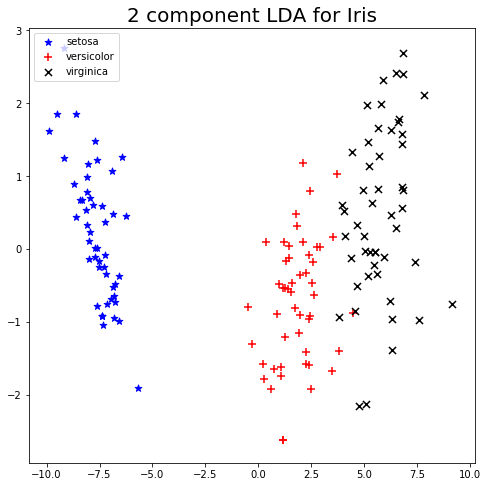

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA for Iris', fontsize = 20)
ax.scatter(finalDf.loc[indicesToKeep0, 'principal component 1']
               , finalDf.loc[indicesToKeep0, 'principal component 2']
               , c = 'blue',marker='*'
               , s = 50,label='setosa')
ax.scatter(finalDf.loc[indicesToKeep1, 'principal component 1']
               , finalDf.loc[indicesToKeep1, 'principal component 2']
               , c = 'red',marker='+'
               , s = 50,label='versicolor')
ax.scatter(finalDf.loc[indicesToKeep2, 'principal component 1']
               , finalDf.loc[indicesToKeep2, 'principal component 2']
               , c = 'black',marker='x'
               , s = 50,label='virginica')
leg=ax.legend(loc='upper left')

# Problem 3

In [164]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [236]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [237]:
y_train

array([6., 5., 4., ..., 3., 0., 1.])

In [238]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [239]:
x_train_transformed_95.shape

(7291, 88)

In [240]:
principalDf95=pd.DataFrame(x_train_transformed_95)

In [241]:
y_train_pd=pd.DataFrame(y_train,columns=['label'])

In [242]:
finalDf=pd.concat([principalDf95,y_train_pd],axis=1)

In [243]:
#(a) keep 0,1

In [279]:
indicesToKeep0 = finalDf.iloc[:,88] == 0
indicesToKeep1 = finalDf.iloc[:,88] == 1
indicesToKeep01=indicesToKeep0+indicesToKeep1

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [280]:
lda=LinearDiscriminantAnalysis()
ldaComponents=lda.fit_transform(x_train_transformed_95[indicesToKeep01,:],y_train[indicesToKeep01])
LDADf = pd.DataFrame(data = ldaComponents,
             columns=['LDA'])

In [281]:
y_train01=pd.DataFrame(y_train[indicesToKeep01],columns=['label'])

In [282]:
y_train01.head()

,label
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [283]:
df=pd.concat([LDADf,y_train01],axis=1)

In [284]:
df.head()

,LDA,label
0,6.720926,1.0
1,-6.478614,0.0
2,5.821675,1.0
3,-6.377166,0.0
4,8.912759,1.0


In [285]:
df.shape

(2199, 2)

In [286]:
ind=pd.DataFrame(data=np.array(range(1,2200)),columns=['ind'])

In [287]:
df=pd.concat([df,ind],axis=1)

In [291]:
np.zeros(2200)

array([0., 0., 0., ..., 0., 0., 0.])

In [292]:
zero=pd.DataFrame(data=np.zeros(2200),columns=['zero'])

In [293]:
df=pd.concat([df,zero],axis=1)

In [301]:
indicesToKeep0 = df.iloc[:,1] == 0
indicesToKeep1 = df.iloc[:,1] == 1

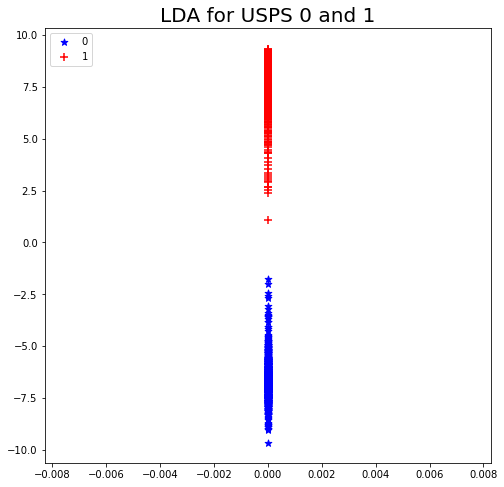

In [305]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 0 and 1', fontsize = 20)
ax.scatter( df.loc[indicesToKeep0, 'zero'], 
           df.loc[indicesToKeep0, 'LDA']
               , c = 'blue',marker='*'
               , s = 50,label='0')
ax.scatter( df.loc[indicesToKeep1, 'zero'],df.loc[indicesToKeep1, 'LDA']
               
               , c = 'red',marker='+'
               , s = 50,label='1')
leg=ax.legend(loc='upper left')

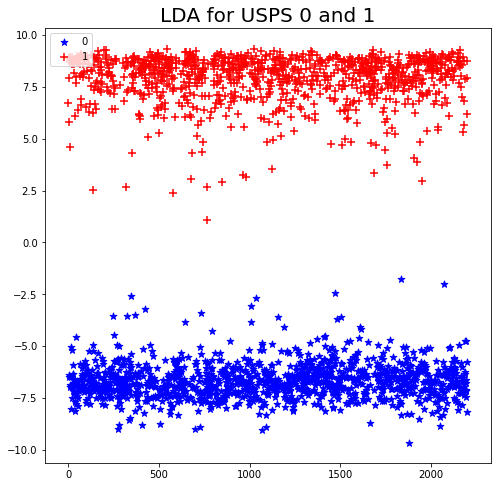

In [306]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 0 and 1', fontsize = 20)
ax.scatter(df.loc[indicesToKeep0, 'ind']
               , df.loc[indicesToKeep0, 'LDA']
               , c = 'blue',marker='*'
               , s = 50,label='0')
ax.scatter(df.loc[indicesToKeep1, 'ind']
               , df.loc[indicesToKeep1, 'LDA']
               , c = 'red',marker='+'
               , s = 50,label='1')
leg=ax.legend(loc='upper left')

In [ ]:
#(b) 4,9

In [310]:
indicesToKeep4 = finalDf.iloc[:,88] == 4
indicesToKeep9 = finalDf.iloc[:,88] == 9
indicesToKeep49=indicesToKeep4+indicesToKeep9

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [311]:
lda=LinearDiscriminantAnalysis()
ldaComponents=lda.fit_transform(x_train_transformed_95[indicesToKeep49,:],y_train[indicesToKeep49])
LDADf = pd.DataFrame(data = ldaComponents,
             columns=['LDA'])

In [312]:
y_train49=pd.DataFrame(y_train[indicesToKeep49],columns=['label'])

In [313]:
df=pd.concat([LDADf,y_train49],axis=1)

In [314]:
df.shape[0]

1296

In [315]:
ind=pd.DataFrame(data=np.array(range(1,(df.shape[0]+1))),columns=['ind'])

In [316]:
df=pd.concat([df,ind],axis=1)

In [317]:
zero=pd.DataFrame(data=np.zeros(1296),columns=['zero'])

In [318]:
df=pd.concat([df,zero],axis=1)

In [323]:
df.head()

,LDA,label,ind,zero
0,-3.357080,4.0,1,0.0
1,-2.778802,4.0,2,0.0
2,-2.014082,4.0,3,0.0
3,-3.163741,4.0,4,0.0
4,-3.090364,4.0,5,0.0


In [324]:
indicesToKeep4 = df.iloc[:,1] == 4
indicesToKeep9 = df.iloc[:,1] == 9

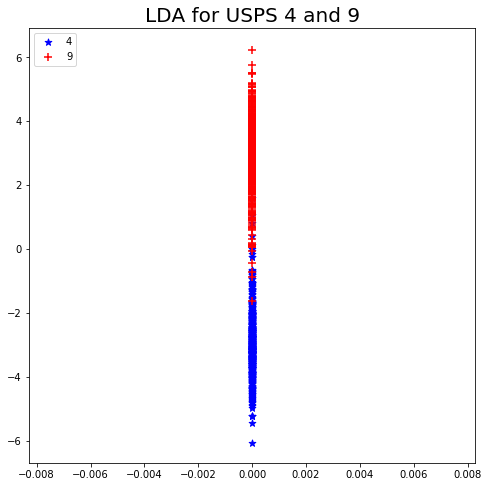

In [327]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 4 and 9', fontsize = 20)
ax.scatter( df.loc[indicesToKeep4, 'zero'], 
           df.loc[indicesToKeep4, 'LDA']
               , c = 'blue',marker='*'
               , s = 50,label='4')
ax.scatter( df.loc[indicesToKeep9, 'zero'],df.loc[indicesToKeep9, 'LDA']
               
               , c = 'red',marker='+'
               , s = 50,label='9')
leg=ax.legend(loc='upper left')

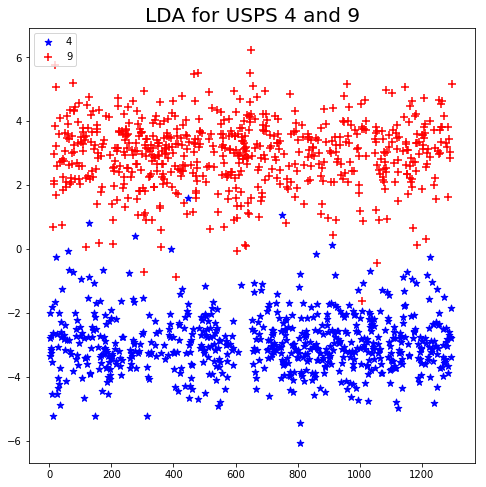

In [326]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 4 and 9', fontsize = 20)
ax.scatter(df.loc[indicesToKeep4, 'ind']
               , df.loc[indicesToKeep4, 'LDA']
               , c = 'blue',marker='*'
               , s = 50,label='4')
ax.scatter(df.loc[indicesToKeep9, 'ind']
               , df.loc[indicesToKeep9, 'LDA']
               , c = 'red',marker='+'
               , s = 50,label='9')
leg=ax.legend(loc='upper left')

In [124]:
#(c)123
indicesToKeep1 = finalDf.iloc[:,88] == 1
indicesToKeep2 = finalDf.iloc[:,88] == 2
indicesToKeep3 = finalDf.iloc[:,88] == 3
indicesToKeep123=indicesToKeep1+indicesToKeep2+indicesToKeep3

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [129]:
lda=LinearDiscriminantAnalysis()
ldaComponents=lda.fit_transform(x_train_transformed_95[indicesToKeep123,:],y_train[indicesToKeep123])
LDADf = pd.DataFrame(data = ldaComponents,
             columns=['LDA1','LDA2'])

In [130]:
y_train123=pd.DataFrame(y_train[indicesToKeep123],columns=['label'])

In [141]:
df=pd.concat([LDADf,y_train123],axis=1)


In [145]:
indicesToKeep1 = df.iloc[:,2] == 1
indicesToKeep2 = df.iloc[:,2] == 2
indicesToKeep3 = df.iloc[:,2] == 3

In [146]:
df.head()

,LDA1,LDA2,label
0,5.628078,3.384899,3.0
1,4.893731,3.609372,3.0
2,-6.249307,0.294443,1.0
3,-4.015301,0.222858,1.0
4,-7.090835,0.123185,1.0


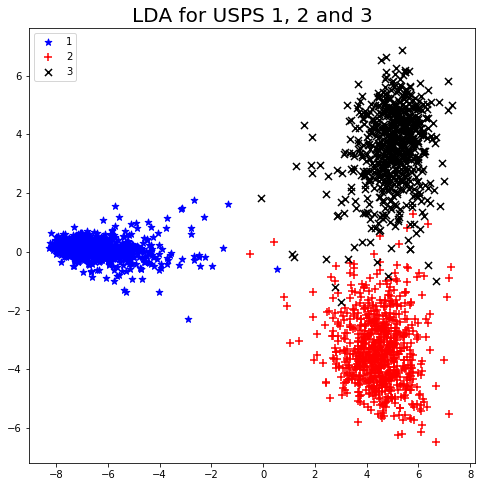

In [148]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 1, 2 and 3', fontsize = 20)
ax.scatter(df.loc[indicesToKeep1, 'LDA1']
               , df.loc[indicesToKeep1, 'LDA2']
               , c = 'blue',marker='*'
               , s = 50,label='1')
ax.scatter(df.loc[indicesToKeep2, 'LDA1']
               , df.loc[indicesToKeep2, 'LDA2']
               , c = 'red',marker='+'
               , s = 50,label='2')
ax.scatter(df.loc[indicesToKeep3, 'LDA1']
               , df.loc[indicesToKeep3, 'LDA2']
               , c = 'black',marker='x'
               , s = 50,label='3')
leg=ax.legend(loc='upper left')

In [ ]:
#(d) 3,5,8

In [149]:
indicesToKeep3 = finalDf.iloc[:,88] == 3
indicesToKeep5 = finalDf.iloc[:,88] == 5
indicesToKeep8 = finalDf.iloc[:,88] == 8
indicesToKeep358=indicesToKeep3+indicesToKeep5+indicesToKeep8

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [150]:
lda=LinearDiscriminantAnalysis()
ldaComponents_train=lda.fit_transform(x_train_transformed_95[indicesToKeep358,:],y_train[indicesToKeep358])
LDADf = pd.DataFrame(data = ldaComponents,
             columns=['LDA1','LDA2'])

In [151]:
y_train358=pd.DataFrame(y_train[indicesToKeep358],columns=['label'])

In [152]:
df=pd.concat([LDADf,y_train358],axis=1)

In [153]:
indicesToKeep3 = df.iloc[:,2] == 3
indicesToKeep5 = df.iloc[:,2] == 5
indicesToKeep8 = df.iloc[:,2] == 8

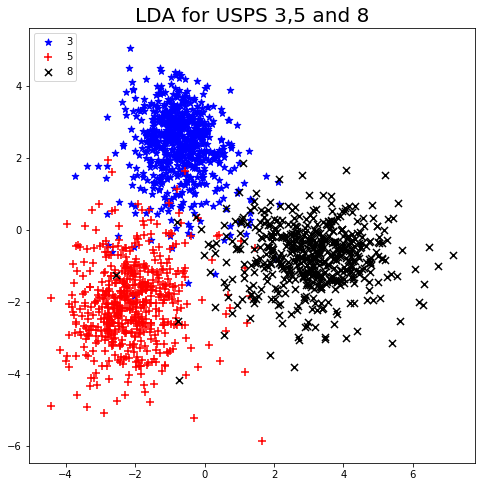

In [154]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_title('LDA for USPS 3,5 and 8', fontsize = 20)
ax.scatter(df.loc[indicesToKeep3, 'LDA1']
               , df.loc[indicesToKeep3, 'LDA2']
               , c = 'blue',marker='*'
               , s = 50,label='3')
ax.scatter(df.loc[indicesToKeep5, 'LDA1']
               , df.loc[indicesToKeep5, 'LDA2']
               , c = 'red',marker='+'
               , s = 50,label='5')
ax.scatter(df.loc[indicesToKeep8, 'LDA1']
               , df.loc[indicesToKeep8, 'LDA2']
               , c = 'black',marker='x'
               , s = 50,label='8')
leg=ax.legend(loc='upper left')

# Problem 4

In [193]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [195]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train)
x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)

In [162]:
import time

In [197]:
test_error_pca_lda=[]
compute_time_lda=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_LDA, y_train)
    y_pred = knn.predict(x_test_LDA)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_pca_lda.append(test_scores)
    end=time.time()
    compute_time_lda.append(end-start)
print(test_error_pca_lda)
print(compute_time_lda)

[0.10961634280019927, 0.10264075734927758, 0.09666168410563025, 0.09616342800199307, 0.0936721474838067, 0.09666168410563025, 0.09566517189835577, 0.09616342800199307, 0.09516691579471848, 0.094170403587444]
[0.04781079292297363, 0.06072402000427246, 0.05542922019958496, 0.058502912521362305, 0.06111598014831543, 0.0627298355102539, 0.06535100936889648, 0.0673980712890625, 0.06982111930847168, 0.0771481990814209]


In [198]:
test_error_pca_95=[]
compute_time_95=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_transformed_95, y_train)
    y_pred = knn.predict(x_test_transformed_95)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_pca_95.append(test_scores)
    end=time.time()
    compute_time_95.append(end-start)
print(test_error_pca_95)
print(compute_time_95)

[0.05331340308918786, 0.05580468360737423, 0.05430991529646234, 0.05530642750373693, 0.05231689088191327, 0.05580468360737423, 0.05580468360737423, 0.058295964125560484, 0.06028898854010967, 0.06377678126557051]
[1.1161081790924072, 1.1500170230865479, 1.1845850944519043, 1.2235729694366455, 1.3183040618896484, 1.2572941780090332, 1.4336819648742676, 1.3611278533935547, 1.3415889739990234, 1.6778550148010254]


In [200]:
neighbours=range(1,11)

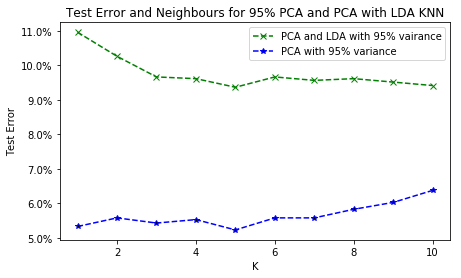

In [213]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)


test_error_pca_lda_g,=plt.plot(neighbours,test_error_pca_lda,color='green',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
test_error_pca_95_g,=plt.plot(neighbours,test_error_pca_95,color='blue',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('KNN Test Error and Neighbours for 95% PCA and PCA with LDA')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error_pca_lda_g,test_error_pca_95_g],["PCA and LDA with 95% vairance","PCA with 95% variance"])

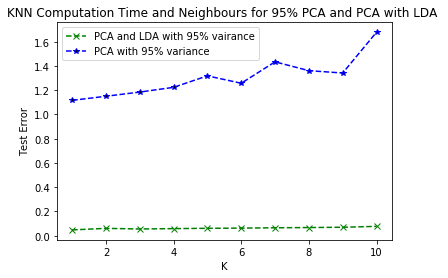

In [215]:
#from matplotlib.ticker import PercentFormatter

#fig = plt.figure(1, (7,4))
#ax = fig.add_subplot(1,1,1)


compute_time_lda_g,=plt.plot(neighbours,compute_time_lda,color='green',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_95_g,=plt.plot(neighbours,compute_time_95,color='blue',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('KNN Computation Time and Neighbours for 95% PCA and PCA with LDA ')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([compute_time_lda_g,compute_time_95_g],["PCA and LDA with 95% vairance","PCA with 95% variance"])

# Problem 5

In [204]:
import math
import operator
import numpy.linalg as LA
import time

In [205]:
def euclideanDistance(instance1, instance2):
 
    return LA.norm(instance1 - instance2)

In [206]:
def getCentroid(arr):
    length = arr.shape[0] # num of points
    return arr.sum(0) / length

In [207]:
def fit(x_train, y_train):
    classes = set(y_train)
    numClass = len(classes)
    class_train = {}
    for i in range(len(x_train)):
        key = y_train[i]
        value = x_train[i]
        if key not in class_train.keys():
            class_train[key] = []
        class_train[key].append(value)
    return class_train

In [208]:
def predict(class_train, x_test, k):
    predictions = []
    keys = class_train.keys()
    
    for x in x_test:
        class_dist = [] # to store [ key, centroid_dist]
        for key in keys:
            value = np.array(class_train[key])
            distances = LA.norm(x - value, axis = 1)           
            idx = np.argsort(distances)
            # use k nearest neighbors to find centroid point and calculate centroid dist through eculideanDistance
            kNearestNeighbors = value[idx[0:k]]
            
            centroid = getCentroid( kNearestNeighbors )
            centroid_dist = LA.norm(centroid - x) 
            
            # add centroid_dist to class_dist (for sorting)
            class_dist.append ( [key, centroid_dist] )
        
        # sort centroid_dist of x
        #class_dist.sort(key=operator.itemgetter(1))
        class_dist = np.array(class_dist)
        rsp_idx = np.argsort(class_dist[:,1])
        # predict y result for x
        #predictions.append(class_dist[0][0])
        predictions.append(class_dist[rsp_idx[0]][0])
             
    return predictions

In [209]:
#With PCA only

In [210]:
test_error_kCentroid_95 = []
compute_time_kcentroid_95=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_95, y_train)

    y_pred = predict(c_train, x_test_transformed_95[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_95.append(test_scores)
    end = time. time()
    compute_time_kcentroid_95.append(end-start)
    
print(test_error_kCentroid_95)
print(compute_time_kcentroid_95)

[0.05331340308918786, 0.0503238664673642, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.04882909815645242, 0.04783258594917783, 0.04783258594917783, 0.04783258594917783]
[10.842242956161499, 10.136459112167358, 10.350134134292603, 10.087142944335938, 9.482161045074463, 9.958962202072144, 10.215382099151611, 10.337499141693115, 10.313534021377563, 10.885890007019043]


In [212]:
test_error_kCentroid_lda = []
compute_time_kcentroid_lda=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_LDA, y_train)

    y_pred = predict(c_train, x_test_LDA[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_lda.append(test_scores)
    end = time. time()
    compute_time_kcentroid_lda.append(end-start)
    
print(test_error_kCentroid_lda)
print(compute_time_kcentroid_lda)

[0.10961634280019927, 0.10662680617837572, 0.10164424514200299, 0.09466865969108118, 0.09616342800199307, 0.09715994020926755, 0.09715994020926755, 0.09217737917289481, 0.09466865969108118, 0.09217737917289481]
[7.424666166305542, 6.854940176010132, 7.094825267791748, 6.903867959976196, 6.527505874633789, 6.746370077133179, 6.804979085922241, 6.421432733535767, 6.226029872894287, 6.544403076171875]


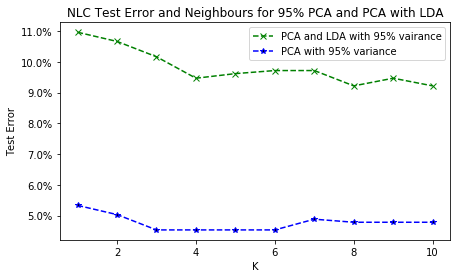

In [217]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)


test_error_kCentroid_lda_g,=plt.plot(neighbours,test_error_kCentroid_lda,color='green',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
test_error_kCentroid_95_g,=plt.plot(neighbours,test_error_kCentroid_95,color='blue',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('NLC Test Error and Neighbours for 95% PCA and PCA with LDA')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error_kCentroid_lda_g,test_error_kCentroid_95_g],["PCA and LDA with 95% vairance","PCA with 95% variance"])

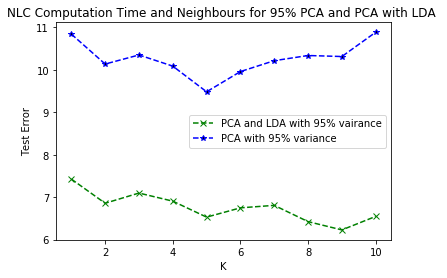

In [219]:
compute_time_kcentroid_lda_g,=plt.plot(neighbours,compute_time_kcentroid_lda,color='green',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_kcentroid_95_g,=plt.plot(neighbours,compute_time_kcentroid_95,color='blue',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('NLC Computation Time and Neighbours for 95% PCA and PCA with LDA ')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([compute_time_kcentroid_lda_g,compute_time_kcentroid_95_g],["PCA and LDA with 95% vairance","PCA with 95% variance"])